16) Quais são os principais motivos de descarte? Qual valor total de descarte? Qual período com maior descarte? Qual sexo é mais descartado? 

In [105]:
import pandas as pd 
import matplotlib.pyplot as plt
import re as re

In [106]:
descarte = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
descarte = descarte[(descarte['obs_desc'] != 'AAA') 
            & (descarte['obs_desc'] != '666')
            & (descarte['obs_desc'] != 'Test BioterC')
            & (descarte['obs_desc'] != 'Test')
            & (descarte['num_ani'] < 200)
            & (descarte['util'] == 'desc')
           ]

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    descarte[d] = pd.to_datetime(descarte[d], unit = 's')
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,1970-01-01 00:11:06,666,666,2,0,Tranferencia cx,AAA


In [107]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

945

In [108]:
descarte['obs_desc'] = list(map(lambda x: str(x).strip(), descarte['obs_desc']))

In [109]:
len(descarte[descarte['obs_desc'] == 'Descarte Zootécnico'])

948

In [112]:
desc_df = pd.DataFrame(descarte['obs_desc'])
desc_df['num_ani'] = descarte['num_ani']
#desc_df = descarte.set_index('obs_desc')
desc_df.head()

#.lower().capitalize()

,obs_desc,num_ani
id,,
66,Descarte Zootecnico,3
73,p/ acasal.,1
95,Tranferencia cx,2
96,Tranferencia cx,4
97,Tranferencia cx,2


In [16]:
descarte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 66 to 18379
Data columns (total 28 columns):
date_hoje         2287 non-null datetime64[ns]
user              2284 non-null object
ling              2287 non-null object
num_ani           2287 non-null int64
m_f               2287 non-null object
date_nasc         2287 non-null datetime64[ns]
id_orig           2287 non-null object
util              2287 non-null object
id_solic          2287 non-null int64
data_inicio       2287 non-null datetime64[ns]
time              2287 non-null object
total_time        2287 non-null int64
doses             2287 non-null int64
data_solic        2287 non-null int64
data_forn         2287 non-null int64
data_fim          2287 non-null int64
num_m             2287 non-null int64
num_f             2287 non-null int64
date_acas         2287 non-null datetime64[ns]
date_nasc_acas    2287 non-null datetime64[ns]
num_nasc          2287 non-null int64
date_sex          2287 non-null datetime64

In [160]:
erro = descarte['obs_desc'].replace(('erro de cadastro', 
                              'erro cadastro', 'error','erro de cadastro era 1 fêmea','erro  de cadastro',
                             'erro programa','Transferencia error','erro de contagem','erro de cadatro',
                             'erro de casa','erro sexagem','Erro Cadastro', 'Erro cadastro', 'Erro cadastro',
                              'Erro de Cadastro', 'Erro no cadastro','Animais fornecidos para Fabiano Figueiredo em 15/02/2018 - Erro no sistema (Exp. já encerrado).',
                              'Erro de registro','Erro de cadastro. Eram femeas', 'Erro de sexagem', 'Erro de cadastro, não estava na cx',
                             'Erro de lançamento no bioterc', 'teste de cadastro', 'ñ encontrado na cx',
                                    'nao estava na cx', 'Erro de cadastro', 'não estava na cx'), 'Erro de cadastro', inplace=True)
descarte['obs_desc'].value_counts()[:25]

Descarte Zootécnico                                         962
Fim Experimento                                             317
Encontrado Morto                                            163
Velhos                                                      110
Erro de cadastro                                             96
Canibalismo                                                  72
Fornecido Zoológico                                          71
Para acasalamento                                            45
UEL                                                          40
Animais Doentes                                              36
Mudança                                                      25
Transferencia cx                                             22
Cascavel                                                     22
Troca de Macho                                               21
Monitoramento Sanitário                                      17
Ivermectina                             

In [150]:
zoo = descarte['obs_desc'].replace(('ZOO', 'fornecido Zoológico', 
                              'Fornecido zoológico', 
                              'Fornecido Zoológico', 
                              'Fornecidos Zoológico',
                             'fornecido zoológico',
                             'zoo', 'zoologico'),'Fornecido Zoológico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [151]:
velhos = descarte['obs_desc'].replace(('velhos', 
                              'ANIMAIS VELHOS',
                             'Animais velhos',
                             'Animais Velhos',
                             'Animal velho'), 'Velhos', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [152]:
descart_zoo = descarte['obs_desc'].replace(('Descarte Zootecnico', 
                              'Caixa caiu no chão > Descarte Zootécnico',
                             'Animais com idade apropriada para descarte zootécnico',
                             'descarte'), 'Descarte Zootécnico', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [153]:
monitoramento = descarte['obs_desc'].replace(('monitoramento sanitario', 
                                              'Kelly monitoramento'), 'Monitoramento Sanitátio', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [154]:
ex_filho = descarte['obs_desc'].replace(('Excesso de filhotes', 'Filhotes em excesso'), 'Excesso de Filhotes', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [155]:
acasa = descarte['obs_desc'].replace(('para acasalamento', 
                              'usada em acasalamento',
                             'P acasalamento experim Rosiane',
                             'Usado em acasalamento',
                             'p acasalamento',
                             'Para acasalamento 21136',
                             'Foi para o acasalamento B2',
                             'foi para acasalamento',
                             'para acasalamento 2:1',
                             'Foi para o acasalamento - Troca de macho',
                             'Usada em acasalamento',
                             'Para acasalamento 2:1',
                             'Foi encaminhada para acasalamento',
                             'Foi encaminhada para acasalamento na experimentação',
                             'Para o acasalamento 193',
                             'Usada no acasalamento 5.50',
                             'para acasalamento 3:!',
                             'Para acasalamento 25568',
                             'Usada no acasalamento 2.54',
                             'Enviado para acasalamento na experimentação.',
                             'Usada no acasalamento',
                             'femea usada em acasalamento 2:1',
                             'Para acasalamento da cesárea', 'Foi encaminhada para acasalamento na experimentação',
                                      'Foi encaminhada para acasalamento'), 'Para acasalamento', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [156]:
lorena = descarte['obs_desc'].replace('Lorena', 'Exp Lorena', inplace=True)
#descarte['obs_desc'].value_counts()[:25]

In [157]:
ninhada_g = descarte['obs_desc'].replace(('ninhada grande', 'Animais |Sacrificados ninhada grande',
                                         'ninhada muito grande', 'Filhote menor na ninhada'),'Ninhada Grande', inplace=True)

In [158]:
trans_cx = descarte['obs_desc'].replace(('nao estavam na cx', 'Transferido para a cx 526141',
                                        'haviam apenas 10 na cx', 'Transferido para a cx 3-1-4-74',
                                        'Transf para a cx 436', 'Transferido para a cx 21237',
                                        'Transferência de cx', 'Troca de cx', 'Transferido para cx 513143',
                                        'Transferido para a cx 512142', 'Transferidos 3 para cx 3.38',
                                        'Transferido para a cx 514144', 'transferência de cx',
                                        'Tranferencia cx', 'Transferido para cx 522150',
                                        'para outra cx'), 'Transferencia cx', inplace=True)

In [159]:
#Na dataframe descarte - coluna obs_desc, buscando padrões para fazer o replace de diferentes termos
#str - indica que é uma string/ contains onde buscarei o padrão / astype boleano/ e apresentando os valores dessa mesma coluna.

descarte[descarte['obs_desc'].str.contains('cx', regex=False).astype('bool')]['obs_desc'].value_counts()

Transferencia cx                                                  22
não estavam na cx                                                  1
Trocado de cx                                                      1
Usada no ac 2:1.bioterc n permite usar Femeas de cx diferente.     1
Name: obs_desc, dtype: int64

In [114]:
#descarte[descarte['obs_desc']] = re.search('Fornecimento',test)
#test = 'Testando a string'
test = desc_df[desc_df['obs_desc']].search('Descarte',test)
result.group(0)
#print(result)
print(result.group(0))

KeyError: "['Descarte Zootecnico' 'p/ acasal.' 'Tranferencia cx' ...\n 'Descarte Zootécnico' 'Descarte Zootécnico' 'Descarte Zootécnico'] not in index"

In [27]:
descarte.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
66,2014-08-26 17:58:05,Tania,Swiss B,3,f,2014-04-03 04:00:00,6,desc,666,666,...,666,666,666,666,666,666,3,0,Descarte Zootecnico,I
73,2014-09-02 12:20:36,Tania,Swiss B,1,m,2014-06-10 04:00:00,55,desc,666,666,...,666,666,666,666,666,666,1,0,p/ acasal.,I
95,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-04-21 04:00:00,67,desc,666,666,...,666,666,666,666,666,666,2,0,Tranferencia cx,AAA
96,2014-09-17 13:14:12,Tania,S129WT,4,m,2014-06-26 04:00:00,68,desc,666,666,...,666,666,666,666,666,666,4,0,Tranferencia cx,AAA
97,2014-09-17 13:14:12,Tania,S129WT,2,m,2014-07-28 04:00:00,69,desc,666,666,...,666,666,666,666,666,666,2,0,Tranferencia cx,AAA


In [30]:
#Função nlargest com os parametros vai apresentar os maiores valores dentro de um limite
#Por exemplo 25 maiores valores na coluna num_ani
descarte.nlargest(25, 'num_ani').head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
3044,2016-02-22 11:44:32,Tania,Balb/c,80,AAA,1970-01-01 00:00:00,AAA,AAA,100,1454302800,...,666,666,666,666,666,666,666,666,Solic Descartada,AAA
3043,2016-02-22 11:44:13,Tania,C57BL06WT,65,AAA,1970-01-01 00:00:00,AAA,AAA,99,1454302800,...,666,666,666,666,666,666,666,666,Solic Descartada,AAA
129,2014-09-23 18:16:16,Tania,Swiss C,60,AAA,1970-01-01 00:11:06,124,desc,666,666,...,1409075167,1411496005,20,1413310405,666,666,60,20,erro programa,AAA
16909,2019-04-03 19:24:45,Tania,C57BL/6,60,AAA,1970-01-01 00:00:00,AAA,AAA,384,1554260400,...,666,666,666,666,666,666,666,666,Solic Descartada,AAA
8001,2017-07-06 11:32:26,Tania,C57BL/6,43,AAA,1970-01-01 00:00:00,AAA,AAA,223,1495422000,...,666,666,666,666,666,666,666,666,Solic Descartada,AAA


In [41]:
descarte[["obs_desc", "num_ani"]].groupby(['obs_desc'])

FUNÇÃO MATCH: Esse método encontra equivalência se ela ocorrer no início da string. GROUP Para retornar a string correspondente vamos usar o método group(). Use ‘r’ no começo da string padrão para designar ao Python uma string raw.
START: Onde encontra a primeira string 
END: Onde encontra a ultima strig

In [139]:
test_match = re.match(r'Fornecido', 'Fornecido Zoológico')
test_match


<re.Match object; span=(0, 9), match='Fornecido'>

In [131]:
test_match = re.match(r'Fornecido', 'Fornecido Zoológico')
test_match.group(0)


'Fornecido'

Apenas mudando a string a ser encontrada, nesse caso ao invéz de pedir pra encontrar "Fornecido", pede pra encontrar "Zoologico" e ao printar não da resultado (em outras IDEs printa 'None' - como aqui não resulta em nada, entendo que deu certo)

In [132]:
test_match = re.match(r'Zoológico', 'Fornecido Zoológico')
test_match

In [136]:
test_match = re.match(r'Fornecido', 'Fornecido Zoológico')
test_match.start()
test_match.end()
#Resultado start 0 (onde começa) end 9 (onde termina)

9

FUNÇÃO SEARCH: É similar a match() mas não nos restringe a encontrar equivalência apenas no começo da string.aqui a busca pelo padrão “Analytics” irá retornar resultado positivo. Aqui podemos ver que o método search() consegue encontrar um padrão em qualquer posição da string mas que somente retorna a primeira ocorrência do padrão de busca.


In [137]:
test_search = re.search(r'Fornecido', 'Fornecido Zoológico')
test_search.group(0)


'Fornecido'

FUNÇÃO FINDALL: É útil obter uma lista de todos os padrões encontrados. Não há restrições em buscar do começo ou do fim. Se usarmos o método findall para buscar por ‘AV’ numa dada string, irá retornar amboas ocorrências de AV. Quando efetuar buscas numa string, recomendo usar re.findall() sempre, funciona como ambas re.search() e re.match().

Não consegui fazer funcionar

In [142]:
test_findall = re.findall(r'erro', 'erro descarte') #mudei de exemplo pra ver se listava mais de uma vez.
test_findall

['erro']

FUNÇÃO SPLIT: Este método ajuda a dividir a string pela ocorrências do padrão dado.

In [144]:
teste_split = re.split(r'e', 'Fornecido')
teste_split

['Forn', 'cido']

FUNÇÃO SUB: Às vezes é útil buscar um padrão de string e substituí-lo por uma nova sub-string. Se o padrão não for encontrado, a string é retornada sem mudanças.

In [145]:
test_sub = re.sub(r'fornecido', 'Fornecido', 'fornecido Zoológico')
test_sub

'Fornecido Zoológico'

FUNÇÃO COMPILE: Podemos combinar uma expressão regular com objetos de padrões, que pode ser usado para encontrar padrões. É útil também para buscar um padrão sem ter que re-escrevê-lo.

In [159]:
test_compile = re.compile('fornecido')
resultado = test_compile.findall('fornecido Zoológico')
resultado
resultado_2 = test_compile.findall('fornecido Zoológico de Curitiba')
resultado_2

['fornecido']

In [119]:
descarte['obs_desc'].value_counts()[:25].sum()

3008

In [122]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].sum()

11871

In [120]:
#somar os demais termos e nomear por outros
descarte['obs_desc'].value_counts()[25:].sum()


356

In [121]:
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[25:].sum()

1339

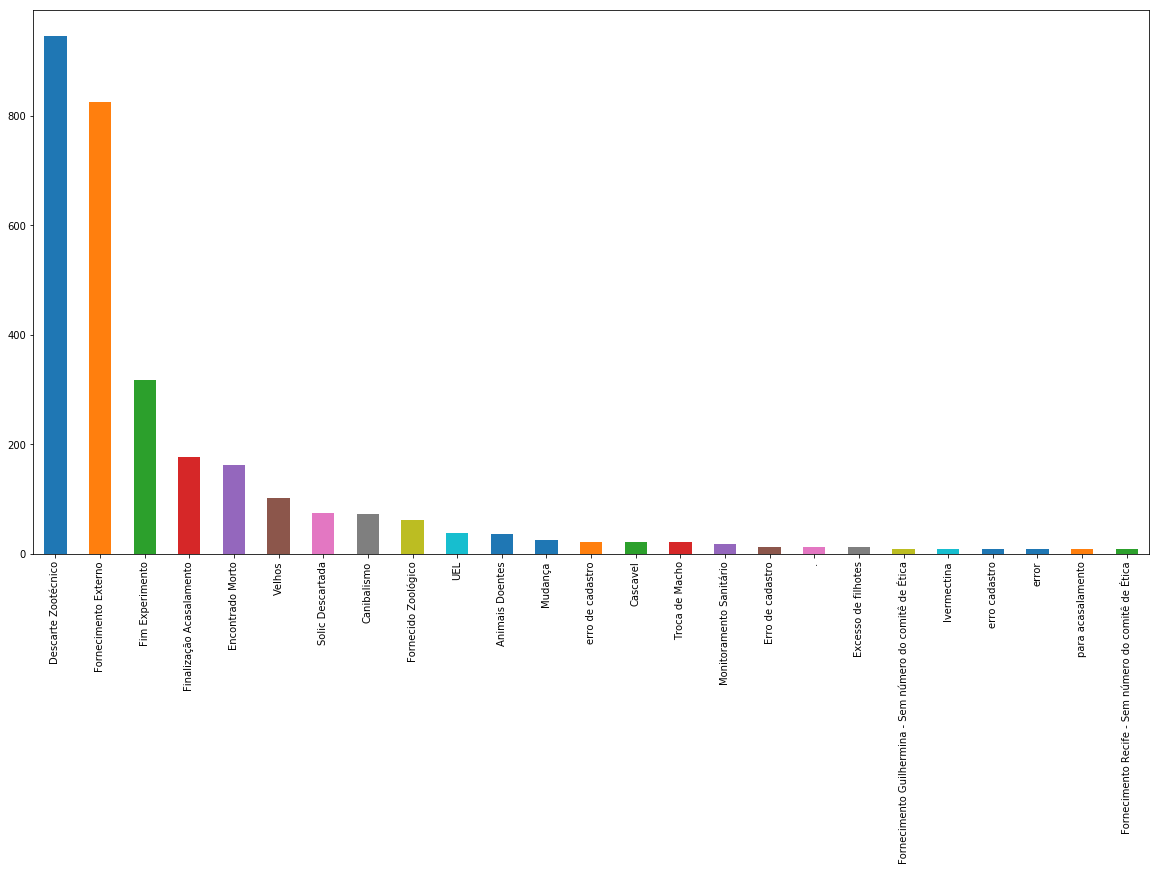

In [123]:
#motivo de descarte
plt.figure(figsize=(20,10))
descarte[(desc['obs_desc'] != 'AAA')
     & (desc['obs_desc'] != '666')
    & (desc['num_ani'] < 200)
    ]['obs_desc'].value_counts()[:25].plot(
    kind='bar'
)

#desc[desc['obs_desc'] == 'Descarte Zootécnico']['num_ani'].sum()

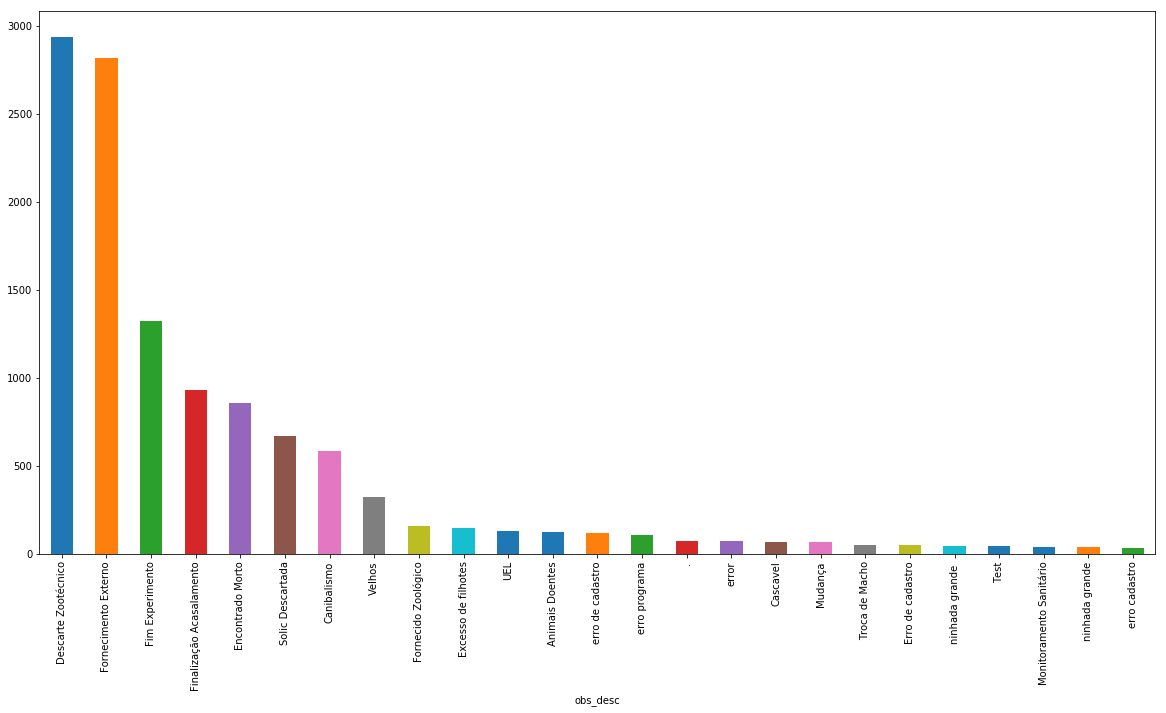

In [124]:
plt.figure(figsize=(20,10))
num_animais = descarte.groupby('obs_desc')
num_animais['num_ani'].sum().sort_values(ascending=False)[:25].plot(
    kind='bar'
)